In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ActivationFunction import *
from Net.Layer import *
from Net.FullConnectedNeuralNetworkBProp import *
from Net.FullConnectedNeuralNetworkRProp import *
from ActivationFunction.ActivationFunction import * 

In [3]:
test_data_pd = pd.read_csv("./Dataset/mnist_test.csv")
train_data_pd = pd.read_csv("./Dataset/mnist_train_small.csv")
columns = ["label"]
pixels = [f"pixel {pixel}" for pixel in range(1, 785)]
columns = columns + pixels

test_data_pd.columns = columns
train_data_pd.columns = columns

print(f"# Campioni di training: {len(train_data_pd)}; # Campioni di test: {len(test_data_pd)}")

def one_hot_encoding(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

# Campioni di training: 19999; # Campioni di test: 9999


In [13]:
train_data = np.array(train_data_pd)
test_data = np.array(test_data_pd)

# piccolo shuffle di cortesia
np.random.shuffle(train_data)
np.random.shuffle(test_data)
rows, cols = test_data.shape

val_data = test_data[0:2500]
# test_data = test_data[2500:rows+1]

X_train = train_data[:, 1:train_data.shape[1]+1].T
# X_train = train_data[:1000, 1:train_data.shape[1]+1].T
Y_train = train_data[:, 0]
# Y_train = train_data[:1000, 0]
Y_train = one_hot_encoding(Y_train)

X_test = test_data[:, 1:test_data.shape[1]+1].T
Y_test = test_data[:, 0]
Y_test = one_hot_encoding(Y_test)

X_val = val_data[:, 1:val_data.shape[1]+1]
Y_val = val_data[:, 0]

print(X_train.shape)
print(Y_train.shape)

(784, 19999)
(10, 19999)


In [379]:
input_layer = Layer(784, 256, SigmoidActivationFunction)
output_layer = Layer(256, 10, SoftMaxActivationFunction)
layers = [input_layer, output_layer]

nn = FullConnectedNeuralNetworkBprop(layers, CrossEntropy, learning_rate = 0.3)
nn.train(X_train, Y_train, validation_set=X_test, validation_targets=Y_test, epochs=50)

Working with 19999 train samples and 10000 val samples
Fine epoch #0; mean_train_error = 2.50105668 - mean_val_error: 2.50085310 - accuracy = 0.09465473 - val_accuracy = 0.09750975
Fine epoch #1; mean_train_error = 2.55745404 - mean_val_error: 2.57593119 - accuracy = 0.32191610 - val_accuracy = 0.31483148
Fine epoch #2; mean_train_error = 2.16471516 - mean_val_error: 2.15912296 - accuracy = 0.27211361 - val_accuracy = 0.27852785
Fine epoch #3; mean_train_error = 2.19202658 - mean_val_error: 2.19198263 - accuracy = 0.45627281 - val_accuracy = 0.45294529
Fine epoch #4; mean_train_error = 1.64081392 - mean_val_error: 1.63742244 - accuracy = 0.42842142 - val_accuracy = 0.42894289
Fine epoch #5; mean_train_error = 1.64396783 - mean_val_error: 1.63683003 - accuracy = 0.53742687 - val_accuracy = 0.54265427
Fine epoch #6; mean_train_error = 1.23853205 - mean_val_error: 1.23165400 - accuracy = 0.60483024 - val_accuracy = 0.60556056
Fine epoch #7; mean_train_error = 1.21608422 - mean_val_error: 

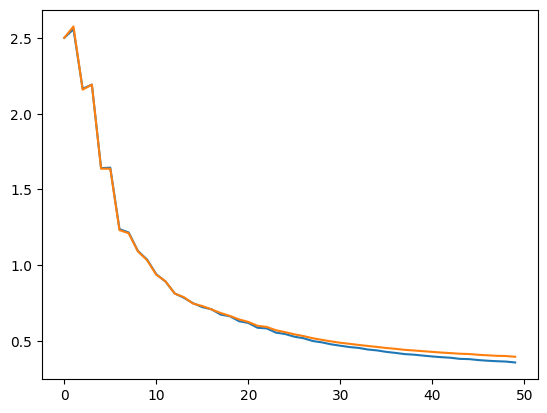

In [380]:
plt.plot(nn.mean_train_error)
plt.plot(nn.mean_val_error)
plt.show()

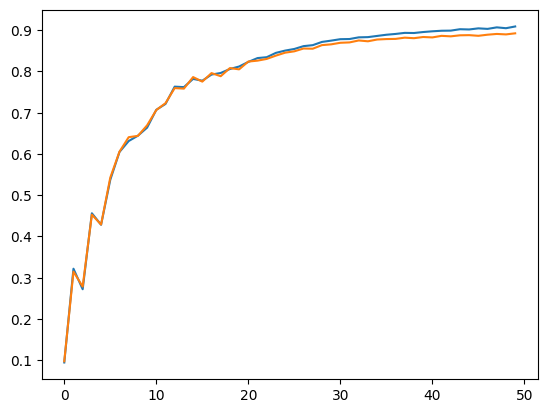

In [381]:
plt.plot(nn.accuracies)
plt.plot(nn.mean_val_accuracy)
plt.show()

In [ ]:
sample_index = 1
prediction = nn.predict(X_test[:, sample_index])
ground_truth = Y_test[:, sample_index]
for elem in range(0, len(prediction)):
  print(f"{prediction[elem]:.3f} - {ground_truth[elem]} - {elem}")

In [388]:
input_layer = Layer(784, 256, SigmoidActivationFunction)
output_layer = Layer(256, 10, SoftMaxActivationFunction)
layers = [input_layer, output_layer]

rprop_nn = FullConnectedNeuralNetworkRprop(layers, CrossEntropy) # , rprop_eta_plus=1.2,rprop_eta_minus=0.25
rprop_nn.train(X_train, Y_train, validation_set=X_test, validation_targets=Y_test, epochs=50)

Working with 19999 train samples and 10000 val samples
Fine epoch #0; mean_train_error = 2.59118115 - mean_val_error: 2.59191769 - accuracy = 0.12125606 - val_accuracy = 0.11211121
Fine epoch #1; mean_train_error = 6.70664980 - mean_val_error: 6.74013718 - accuracy = 0.02145107 - val_accuracy = 0.01730173
Fine epoch #2; mean_train_error = 10.09593808 - mean_val_error: 10.14717648 - accuracy = 0.02260113 - val_accuracy = 0.01900190
Fine epoch #3; mean_train_error = 13.77703457 - mean_val_error: 13.84999546 - accuracy = 0.01975099 - val_accuracy = 0.01600160
Fine epoch #4; mean_train_error = 18.35466733 - mean_val_error: 18.45818005 - accuracy = 0.01405070 - val_accuracy = 0.01210121
Fine epoch #5; mean_train_error = 24.27394162 - mean_val_error: 24.40521322 - accuracy = 0.01035052 - val_accuracy = 0.01060106
Fine epoch #6; mean_train_error = 31.91012717 - mean_val_error: 32.07486992 - accuracy = 0.01180059 - val_accuracy = 0.01120112
Fine epoch #7; mean_train_error = 41.58310866 - mean_

c:\Users\maria\OneDrive\Documenti\Università\Università\Magistrale\Neural Networks and Deep Learning\SimpleNeuralNetwork\ActivationFunction\ActivationFunction.py:23: RuntimeWarning: invalid value encountered in divide
  return x_exp / x_exp_sum


Fine epoch #31; mean_train_error = 12.58304919 - mean_val_error: 12.30444587 - accuracy = 0.01655083 - val_accuracy = 0.01610161
Fine epoch #32; mean_train_error = 0.00000000 - mean_val_error: nan - accuracy = 0.09810491 - val_accuracy = 0.09800980
Fine epoch #33; mean_train_error = 0.00000000 - mean_val_error: nan - accuracy = 0.09810491 - val_accuracy = 0.09800980
Fine epoch #34; mean_train_error = 0.00000000 - mean_val_error: nan - accuracy = 0.09810491 - val_accuracy = 0.09800980
Fine epoch #35; mean_train_error = 0.00000000 - mean_val_error: nan - accuracy = 0.09810491 - val_accuracy = 0.09800980
Fine epoch #36; mean_train_error = 0.00000000 - mean_val_error: nan - accuracy = 0.09810491 - val_accuracy = 0.09800980
Fine epoch #37; mean_train_error = 0.00000000 - mean_val_error: nan - accuracy = 0.09810491 - val_accuracy = 0.09800980
Fine epoch #38; mean_train_error = 0.00000000 - mean_val_error: nan - accuracy = 0.09810491 - val_accuracy = 0.09800980
Fine epoch #39; mean_train_erro

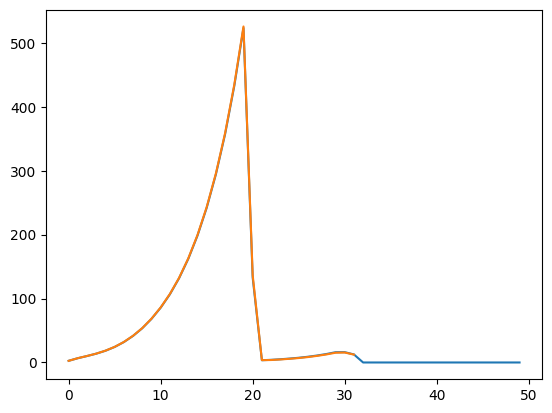

In [389]:
plt.plot(rprop_nn.mean_train_error)
plt.plot(rprop_nn.mean_val_error)
plt.show()

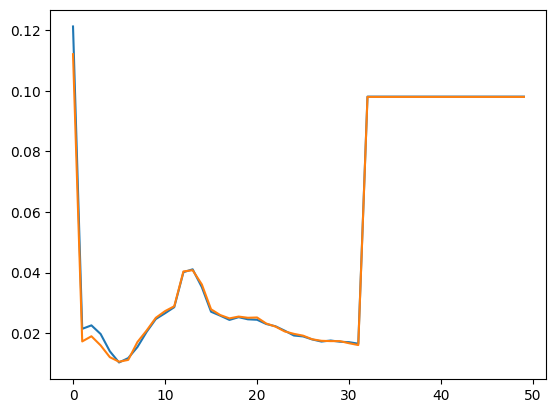

In [390]:
plt.plot(rprop_nn.accuracies)
plt.plot(rprop_nn.mean_val_accuracy)
plt.show()

In [ ]:
results = []
for i in range(10):
    print(np.argmax(rprop_nn.predict(X_test[:, i])), np.argmax(Y_test[:, i]))

4 4
6 1
4 6
7 7
8 8
1 9
1 1
3 3
4 4
5 5


In [38]:
sample_index = 5
prediction = rprop_nn.predict(X_test[:, sample_index])
ground_truth = Y_test[:, sample_index]
for elem in range(0, len(prediction)):
  print(f"{prediction[elem]:.3f} - {ground_truth[elem]} - {elem}")

1.000 - 1.0 - 0
0.000 - 0.0 - 1
0.000 - 0.0 - 2
0.000 - 0.0 - 3
0.000 - 0.0 - 4
0.000 - 0.0 - 5
0.000 - 0.0 - 6
0.000 - 0.0 - 7
0.000 - 0.0 - 8
0.000 - 0.0 - 9


In [ ]:
not_encoded_rprop_nn = FullConnectedNeuralNetworkRprop([Layer(784, 256, SigmoidActivationFunction),
                                                        Layer(256, 10, SoftMaxActivationFunction)],
                                                        SumOfSquaredError,
                                                        rprop_eta_minus=0.0001,
                                                        rprop_eta_plus=2
                                                        )
not_encoded_rprop_nn.train(X_train, Y_train, validation_set=X_test, validation_targets=Y_test, epochs=150)

In [35]:
encoder_size = [627, 470, 392, 313, 156]
number_of_epoch_encoder = 300
number_of_training_epochs = 150
encoder_layer_size = encoder_size[0]
metrics = {}

In [36]:
rprop_encoder = FullConnectedNeuralNetworkBprop([Layer(784, encoder_layer_size, RELUActivationFunction),
                                                 Layer(encoder_layer_size, 784, RELUActivationFunction)
                                                 ], SumOfSquaredError, 0.0005)

In [ ]:
rprop_encoder.train(X_train, X_train, number_of_epoch_encoder)

In [ ]:
encoder_file = open("saved_encoder.npz", "wb")
np.savez(encoder_file, layer0_w = rprop_encoder.layers[0].weights, layer0_b = rprop_encoder.layers[0].biases,
                       layer1_w = rprop_encoder.layers[1].weights, layer1_b = rprop_encoder.layers[1].biases)

In [37]:
encoder_file = np.load("saved_encoder.npz")

In [38]:
rprop_encoder.layers[0].weights = encoder_file['layer0_w']
rprop_encoder.layers[0].biases = encoder_file['layer0_b']

rprop_encoder.layers[1].weights = encoder_file['layer1_w']
rprop_encoder.layers[1].biases = encoder_file['layer1_b']

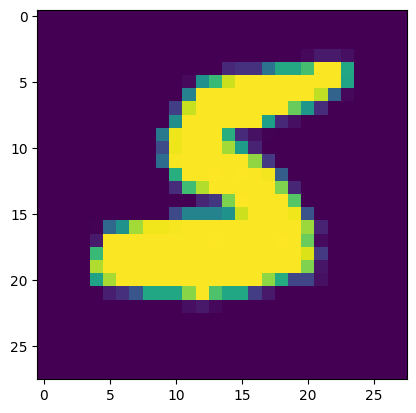

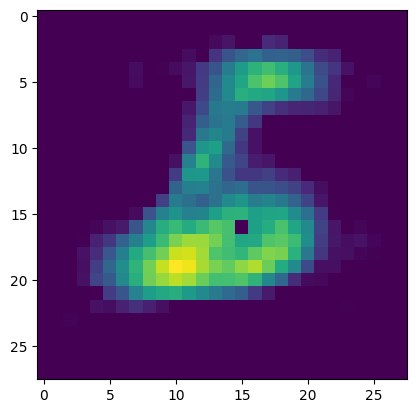

In [41]:
sample_index = 2
plt.imshow(X_test[:, sample_index].reshape([28, 28]))
plt.show()
plt.imshow(rprop_encoder.predict(X_test[:, sample_index]).reshape([28, 28]))
plt.show()

In [14]:
encoder = FullConnectedNeuralNetwork([rprop_encoder.layers[0]], SumOfSquaredError)

X_encoded_train = np.empty([encoder_layer_size, X_train.shape[1]])
Y_encoded_train = Y_train
for X_sample in X_train.T:
  X_encoded_train[:, 0] = encoder.predict(X_sample)

print(X_encoded_train.shape)
print(X_encoded_train.shape)

X_encoded_test = np.empty([encoder_layer_size, X_test.shape[1]])
Y_encoded_test = Y_test
for X_sample in X_test.T:
  X_encoded_test[:, 0] = encoder.predict(X_sample)

print(X_encoded_test.shape)
print(X_encoded_test.shape)

(627, 1000)
(627, 1000)
(627, 9999)
(627, 9999)


In [41]:
encoded_rprop_nn = FullConnectedNeuralNetworkRprop([Layer(encoder_layer_size, 256, RELUActivationFunction),
                                                    Layer(256, 10, SoftMaxActivationFunction)],
                                                   CrossEntropy, max_step_size=25
                                                   )
encoded_rprop_nn.train(X_encoded_train, Y_encoded_train, validation_set=X_encoded_test, validation_targets=Y_encoded_test, epochs=50)

Working with 1000 samples
Fine epoch #0; train_error = 2729.70926421 - val_error: 25128.56490810 - accuracy = 0.11400000
Fine epoch #1; train_error = 147853.84377566 - val_error: 1503115.99708888 - accuracy = 0.11411400
Fine epoch #2; train_error = 2374.53285108 - val_error: 23782.12551713 - accuracy = 0.10411411
Fine epoch #3; train_error = 2357.30536890 - val_error: 23641.86534293 - accuracy = 0.10410411
Fine epoch #4; train_error = 2346.14130944 - val_error: 23540.49817117 - accuracy = 0.10410410
Fine epoch #5; train_error = 2338.42248930 - val_error: 23419.47643932 - accuracy = 0.10410410
Fine epoch #6; train_error = 2688.30843697 - val_error: 27172.06543687 - accuracy = 0.11410410
Fine epoch #7; train_error = 2343.38317643 - val_error: 23422.69980993 - accuracy = 0.10411410


KeyboardInterrupt: 

In [ ]:
sample_index = 3
prediction = encoded_rprop_nn.predict(X_encoded_train[:, sample_index])
ground_truth = Y_encoded_test[:, sample_index]
for elem in range(0, len(prediction)):
  print(f"{prediction[elem]:.3f} - {ground_truth[elem]} - {elem}")

0.988 - 0.0 - 0
0.986 - 0.0 - 1
0.887 - 0.0 - 2
0.976 - 0.0 - 3
0.958 - 0.0 - 4
0.948 - 0.0 - 5
0.980 - 0.0 - 6
0.748 - 0.0 - 7
0.821 - 0.0 - 8
0.979 - 1.0 - 9


In [ ]:
encoded_rprop_nn = FullConnectedNeuralNetworkRprop([Layer(encoder_layer_size, 256, RELUActivationFunction),
                                                    Layer(256, 10, SoftMaxActivationFunction)],
                                                   CrossEntropy,
                                                   )
encoded_rprop_nn.train(X_encoded_train, Y_encoded_train, validation_set=X_encoded_test, validation_targets=Y_encoded_test, epochs=20)


In [ ]:
encoded_rprop_nn = FullConnectedNeuralNetworkRprop([Layer(encoder_layer_size, 256, SigmoidActivationFunction),
                                                    Layer(256, 10, SoftMaxActivationFunction)],
                                                   CrossEntropy,
                                                   learning_rate = 1,
                                                   rprop_eta_minus=0.0001,
                                                   rprop_eta_plus=2
                                                    )
encoded_rprop_nn.train(X_encoded_train, Y_encoded_train, validation_set=X_encoded_test, validation_targets=Y_encoded_test, number_of_training_epochs=20)

metrics[f"{encoder_layer_size}"] = {"train_errors":encoded_rprop_nn.mean_train_error,
                                    "val_errors":encoded_rprop_nn.mean_val_error,
                                    "accuracy":encoded_rprop_nn.accuracies}

In [ ]:
encoder_layer_size = encoder_size[0]
rprop_encoder = FullConnectedNeuralNetworkBprop([Layer(784, encoder_layer_size, LeakyRELUActivationFunction),
                                                 Layer(encoder_layer_size, 784, RELUActivationFunction)
                                                 ], SumOfSquaredError, 0.00005)

rprop_encoder.train(X_train[], X_train[], number_of_epoch_encoder)

sample_index = 1
plt.imshow(X_train[:, sample_index].reshape([28, 28]))
plt.show()
plt.imshow(rprop_encoder.predict(X_train[:, sample_index]).reshape([28, 28]))
plt.show()

encoder = FullConnectedNeuralNetwork([rprop_encoder.layers[0]], SumOfSquaredError)

X_encoded_train = np.empty([encoder_layer_size, X_train.shape[1]])
Y_encoded_train = Y_train
for X_sample in X_train.T:
  X_encoded_train[:, 0] = encoder.predict(X_sample)

print(X_encoded_train.shape)
print(X_encoded_train.shape)

X_encoded_test = np.empty([encoder_layer_size, X_test.shape[1]])
Y_encoded_test = Y_test
for X_sample in X_test.T:
  X_encoded_test[:, 0] = encoder.predict(X_sample)

print(X_encoded_test.shape)
print(X_encoded_test.shape)

encoded_rprop_nn = FullConnectedNeuralNetworkRprop([Layer(encoder_layer_size, 256, SigmoidActivationFunction),
                                                    Layer(256, 10, SoftMaxActivationFunction)],
                                                   CrossEntropy,
                                                   learning_rate = 1,
                                                   rprop_eta_minus=0.0001,
                                                   rprop_eta_plus=2
                                                    )
encoded_rprop_nn.train(X_encoded_train, Y_encoded_train, validation_set=X_encoded_test, validation_targets=Y_encoded_test, number_of_training_epochs=20)

metrics[f"{encoder_layer_size}"] = {"train_errors":encoded_rprop_nn.mean_train_error,
                                    "val_errors":encoded_rprop_nn.mean_val_error,
                                    "accuracy":encoded_rprop_nn.accuracies}